# Fraude nas Eleições?

Após escultar o podcast [**Naruhodo #154**](https://www.b9.com.br/98315/naruhodo-154-o-que-e-a-lei-de-benford/), soube que um vídeo ficou popular falando sobre [possíveis fraudes nas eleições de 2014](https://www.youtube.com/watch?v=FgpYrXN00Sw&ab_channel=BrasilParalelo). Motivado pela discussão do episódio, fui mais a fundo no assunto. 
No vídeo, apesar das acusações, o estudo divulgado não é detalhado. Ou seja, a metodologia usada para encontrar os resultados não está disponível (pública). Portanto, não podemos ter a replicabilidade exata dos resultados (ou conferí-los). 

Após algumas leituras sobre a utilização da **Lei de Benford na auditação de eleições** <sup>[[1]](https://web.archive.org/web/20140517120934/http://vote.caltech.edu/sites/default/files/benford_pdf_4b97cc5b5b.pdf) [[2]](https://aip.scitation.org/doi/10.1063/1.166498)</sup>, vi que a sua utilização é no mínimo questionável. Como o vídeo não traz um estudo em sí, apenas os resultados tentarei replicá-los baseando-me apenas na aplicação da Lei de Benford. Inicialmente os dados analizá-dos serão os das eleições para presidente de 2014. 
___



## 1. O que é a Lei de Benford?
A lei de Benford ou lei do primeiro dígito é uma observação da distribuição de dígitos presente em várias conjuntos de números reais. Simplificadamente, a **lei diz que o primeiro dígito significante é provavelmente pequeno**. Esse [vídeo](https://www.youtube.com/watch?v=XXjlR2OK1kM&ab_channel=Numberphile) do [Numberphille](https://www.youtube.com/channel/UCoxcjq-8xIDTYp3uz647V5A) traz uma ótima explicação sobre o assunto.

Matematicamente, a Lei de Benford diz que probabilidade da ocorrencia do dígito $n$ na primeira posição em uma conjunto de números segue a seguinte equação:

$$
P(n) = \log_{10}\left(1 + \frac{1}{n}\right)
$$

Por exemplo, a distribuição dos primeiro dígito da população de 237 países em Julho de 2010, indica uma distribuição que segue a Lei de Benford.
![Fonte: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/0/0b/Benfords_law_illustrated_by_world%27s_countries_population.png "Fonte: https://en.wikipedia.org/wiki/Benford%27s_law")

### Restrições
Apesar de vários conjuntos de dados seguirem essa distribuição, exitem algumas condições.

- Os dados devem abrangir várias ordens de magnitude de maneira relativamente uniforme.
- Flutuações multiplicativas geram essa distribuição (sequencia de produtos de probabilidades)



___
# Aplicando a Lei de Benford

Vamos primeiro aplicar a lei em alguns dados públicos e verificar sua eficácia.

## 1. Eleitores por Município
Primeiro, vamos verificar se a quantidade de eleitores por cidade segue o padrão descrito na lei de Benford. É uma estimativa razoável, já que a quantidade de eleitores é proporcional a de habitantes. Os dados usados nessa análise foram retirados dos site do [TSE](http://www.tse.jus.br/eleitor/estatisticas-de-eleitorado/quantitativo-do-eleitorado) dia 27 de Outubro de 2018.

Primeiro, vamos **importar os dados do TSE** e dá uma olhada neles.


In [13]:
# Atualizar alguns packages
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 4.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [32]:
import pandas as pd

# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/eleitores_2018_set.csv"
eleitores = pd.read_csv(url, header=0, encoding='latin-1', sep=";")

# Mostra as primeiras linhas dos dados
print(eleitores.head())


# Informações sobre os dados
print(eleitores.info())

# Mostra as últimas linhas dos dados
print(eleitores.tail())

# Municípios únicos
print(eleitores.tail())


           Mês/Ano  UF     Município  Zona Quantidade   %  Unnamed: 6
0  Setembro - 2018  AC    ACRELÂNDIA   8.0      8.809 NaN         NaN
1              NaN  AC  ASSIS BRASIL   6.0      5.726 NaN         NaN
2              NaN  AC     BRASILÉIA   6.0     16.041 NaN         NaN
3              NaN  AC        BUJARI   9.0      8.683 NaN         NaN
4              NaN  AC      CAPIXABA   2.0      6.832 NaN         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 7 columns):
Mês/Ano       3 non-null object
UF            6273 non-null object
Município     6273 non-null object
Zona          6273 non-null float64
Quantidade    6275 non-null object
%             0 non-null float64
Unnamed: 6    0 non-null float64
dtypes: float64(3), object(4)
memory usage: 343.2+ KB
None
             Mês/Ano   UF Município  Zona   Quantidade   %  Unnamed: 6
6270             NaN   ZZ    YANGON   1.0            9 NaN         NaN
6271             NaN   ZZ    ZAGRE

As colunas que nos iteressam são:
 - **Município**: Nome do município.
 - **Quantiadde**: Quantidade de eleitores.
 
 
 Vamos fazer alguns ajustes:
 1. Filtrar as colunas
 2. Remover entradas em branco **6273** e **6274**.
 3. Remover o ponto dos valores em `Quantidade`.

In [33]:
# Filtra os dados
eleitores = eleitores[["Município", "Quantidade"]]
eleitores = eleitores.dropna(axis=0)

# Remove os pontos nos valores numéricos
eleitores["Quantidade"] = eleitores.Quantidade.apply(lambda x: x.replace(".",""))

# Após a limpeza
print(eleitores.info())
print("Total de Eleitores: " + str(eleitores.Quantidade.astype('float64').sum()))
print(eleitores.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 6272
Data columns (total 2 columns):
Município     6273 non-null object
Quantidade    6273 non-null object
dtypes: object(2)
memory usage: 147.0+ KB
None
Total de Eleitores: 147306275.0
               Município Quantidade
0             ACRELÂNDIA       8809
1           ASSIS BRASIL       5726
2              BRASILÉIA      16041
3                 BUJARI       8683
4               CAPIXABA       6832
5        CRUZEIRO DO SUL      54600
6         EPITACIOLÂNDIA      10770
7                  FEIJÓ      20565
8                 JORDÃO       4793
9            MÂNCIO LIMA      12429
10         MANOEL URBANO       6793
11  MARECHAL THAUMATURGO       9530
12     PLÁCIDO DE CASTRO      11461
13            PORTO ACRE      12299
14          PORTO WALTER       6075
15            RIO BRANCO     129768
16            RIO BRANCO     125780
17       RODRIGUES ALVES      11001
18   SANTA ROSA DO PURUS       3316
19        SENA MADUREIRA 

 De acordo com o [TSE](http://www.tse.jus.br/imprensa/noticias-tse/2018/Agosto/brasil-tem-147-3-milhoes-de-eleitores-aptos-a-votar-nas-eleicoes-2018), de fato, tivemos essa quantidade de eleitores em 2018. Assim, podemos continuar nossa análise.
 
 Agora vamos escrever uma função que coletar as **distribuições dos dígitos presentes nesses dados**.

 

In [34]:
# Função que coleta a frequência dos primeiros dígitos.
def fd_freq(df, col):
    """
    Retorna a distribuição dos primeiros dígitos da coluna especificada.

    > df: DataFrame de análise
    > col: Coluna que será analisada.
    < df_freq: DataFrame com os resultados;

    """
    # lista de dígitos 1...9
    digits = [str(d) for d in range(1, 10)]
    columns = ["Ocorrências", "Porcentagem"]
    df_freq = pd.DataFrame(index=digits, columns=columns)

    # Para cada dígito
    for d in digits:
        # Total de observações do dígito
        total = df[col].apply(lambda x: x[0] == d).sum()
        
        # Salvo no df
        df_freq.loc[d, "Ocorrências"] = total
        df_freq.loc[d, "Porcentagem"] = total / df.shape[0]
        
    return df_freq

first_digit_freq = fd_freq(eleitores, "Quantidade")

print(first_digit_freq)
  

  Ocorrências Porcentagem
1        1817    0.289654
2         982    0.156544
3         764    0.121792
4         619   0.0986769
5         514   0.0819385
6         464   0.0739678
7         402   0.0640842
8         385   0.0613741
9         326   0.0519688


Hmm.. Esses resultados parecem bem próximos dos previstos na Lei de Benford, **vamos plotar os gráficos**.

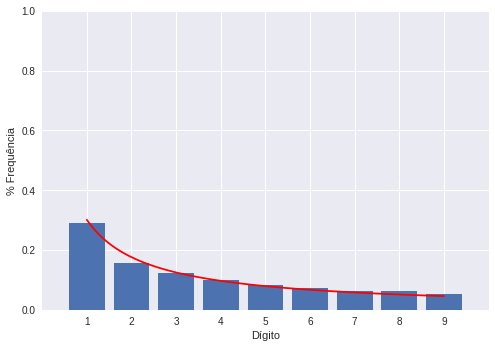

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Plot dos valores observados
x_o = first_digit_freq.index.values.astype(int)
y_o = first_digit_freq["Porcentagem"].values
plt.bar(x_o, y_o, label="Valores observados")

# Plot da Lei de Bendford
x = np.linspace(1, 9, 100)
y = np.log10(1 + (1/x))
plt.plot(x, y, label = "Lei de Benford", c='r')

ax = plt.gca()
ax.set_xlabel("Dígito")
ax.set_ylabel("% Frequência")
ax.set_xticks(x_o)
ax.set_ylim((0, 1))
ax.set_xlim((0, 10))
plt.show()

Como esperado os resultados semguem a lei. Vamos dá uma olhada na distribuição dos valores que estávamos analisando, **Quantiade de Eleitores**.

1.0
264796.0


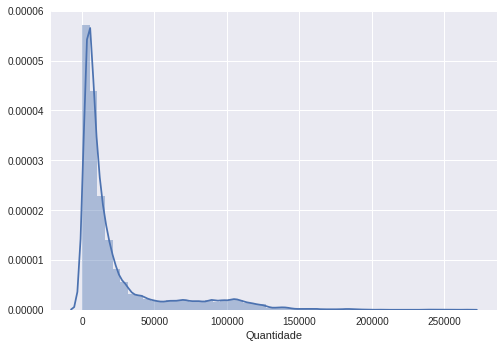

In [38]:
import seaborn as sns

sns.distplot(eleitores["Quantidade"].astype('float64'))

print(eleitores["Quantidade"].astype('float64').min())
print(eleitores["Quantidade"].astype('float64').max())

Os valores possuem distribuição próxima da normal e estão definidos em um intervalo de diferentes ordens de grandeza $[1, 264796]$.


## 2. Votos Válidos por Município
Agora, vamos assumir que o número de votos válidos também se comporta de conforme a lei de Benford. 

Mais uma vez os dados foram coletados diretamento do site [TSE](http://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais) no dia 27 de Outubro de 2018.

Aplicando os mesmo passos anteriores...

In [0]:
# Importa os dados coletados do TSE
url = "https://raw.githubusercontent.com/Fernandohf/Benford-s-Law/master/eleitores_2018_set.csv"
eleitores = pd.read_csv(url, header=0, encoding='latin-1', sep=";")


# Filtra os dados
eleitores = eleitores[["Município", "Quantidade"]]
eleitores = eleitores.dropna(axis=0)

# Remove os pontos nos valores numéricos
eleitores["Quantidade"] = eleitores.Quantidade.apply(lambda x: x.replace(".",""))


print("Total de Eleitores: " + str(eleitores.Quantidade.astype('float64').sum()))


# Função que coleta a frequência dos primeiros dígitos.
def fd_freq(df, col):
    """
    Retorna a distribuição dos primeiros dígitos da coluna especificada.

    > df: DataFrame de análise
    > col: Coluna que será analisada.
    < df_freq: DataFrame com os resultados;

    """
    # lista de dígitos 1...9
    digits = [str(d) for d in range(1, 10)]
    columns = ["Ocorrências", "Porcentagem"]
    df_freq = pd.DataFrame(index=digits, columns=columns)

    # Para cada dígito
    for d in digits:
        total = df[col].apply(lambda x: x[0] == d).sum()
        df_freq.loc[d, "Ocorrências"] = total
        df_freq.loc[d, "Porcentagem"] = total / df.shape[0]
    return df_freq

first_digit_freq = fd_freq(eleitores, "Quantidade")

import matplotlib.pyplot as plt
import numpy as np

# Plot dos valores observados
x_o = first_digit_freq.index.values.astype(int)
y_o = first_digit_freq["Porcentagem"].values
plt.bar(x_o, y_o, label="Valores observados")

# Plot da Lei de Bendford
x = np.linspace(1, 9, 100)
y = np.log10(1 + (1/x))
plt.plot(x, y, label = "Lei de Benford", c='r')

ax = plt.gca()
ax.set_xticks(x_o)
ax.set_ylim((0, 1))
ax.set_xlim((0, 10))